# Edge Box Plot 边缘箱形图
Edge box plot is similar to edge histogram, while the difference is to viualize the intermediate value of X and Y

边缘箱图与边缘直方图具有相似的用途。然而，箱线图有助于精确定位X和Y的中位数，第25和第75百分位数。
又称为盒须图、盒式图、盒状图或箱线图，是一种用作显示一组数据分散情况资料的统计图。 因型状如箱子而得名。 在各种领域也经常被使用，常见于品质管理

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.3
0.9.0


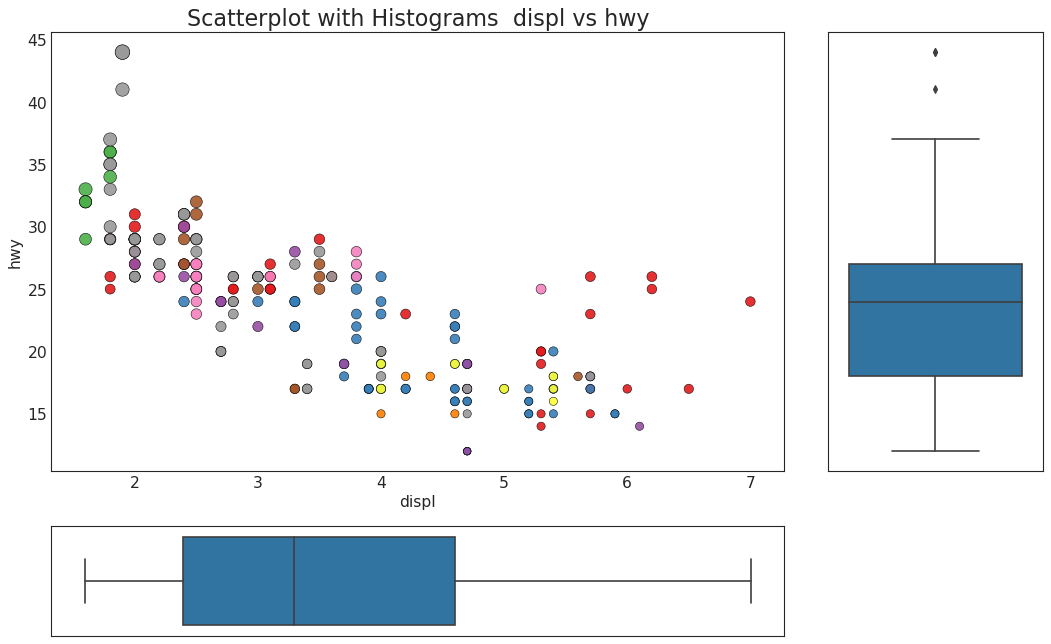

In [5]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \
 displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()